In [87]:
!pip install seaborn
!pip install pandas

In [88]:
import pandas
print(pandas.__version__)

2.1.4


In [89]:
import pandas as pd
dataset = pd.read_csv("titanic.csv")

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  895 non-null    int64  
 1   Survived     895 non-null    int64  
 2   Pclass       895 non-null    int64  
 3   Name         895 non-null    object 
 4   Gender       895 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        895 non-null    int64  
 7   Parch        895 non-null    int64  
 8   Ticket       895 non-null    object 
 9   Fare         895 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     893 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.0+ KB


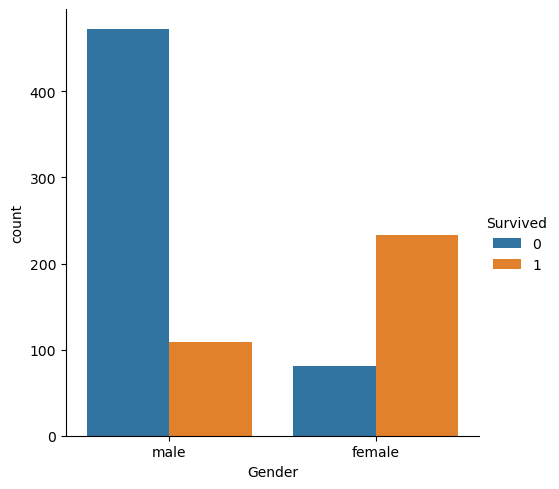

In [91]:
import seaborn as sns

# 데이터프레임의 'Gender'와 'Survived' 열을 문자열로 변환
dataset['Gender'] = dataset['Gender'].astype(str)
dataset['Survived'] = dataset['Survived'].astype(str)

# catplot 실행
sns.catplot(x="Gender", hue="Survived", kind="count", data=dataset)

In [92]:
dataset.drop(columns='Name', inplace=True)
dataset.head(5)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
dataset.drop(columns=['Cabin', 'Ticket', 'Embarked'], inplace=True)
dataset.head(5)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [94]:
dataset[dataset.duplicated()]

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
891,891,0,3,male,32.0,0,0,7.75
892,891,0,3,male,32.0,0,0,7.75
893,891,0,3,male,32.0,0,0,7.75
894,891,0,3,male,32.0,0,0,7.75


In [95]:
dataset.drop_duplicates(inplace=True)
dataset[dataset.duplicated()]
dataset.tail(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
881,882,0,3,male,33.0,0,0,7.8958
882,883,0,3,female,22.0,0,0,10.5167
883,884,0,2,male,28.0,0,0,10.5000
884,885,0,3,male,25.0,0,0,7.0500
885,886,0,3,female,39.0,0,5,29.1250
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000
890,891,0,3,male,32.0,0,0,7.7500


In [96]:
dataset.isnull().head(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


<Axes: >

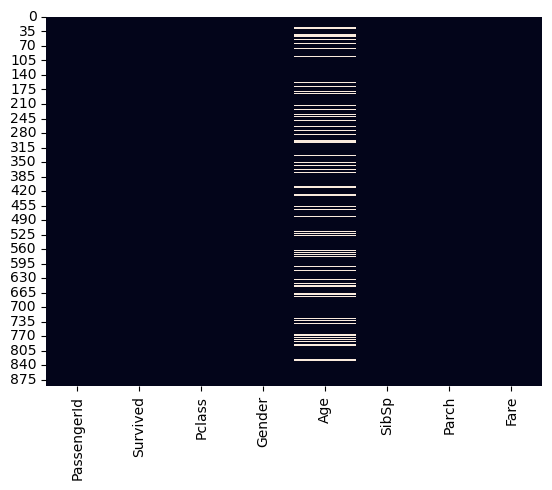

In [97]:
import seaborn as sns
sns.heatmap(dataset.isnull(), cbar=False)

In [98]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Gender           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [99]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [100]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [101]:
dataset.head(10)
dataset.replace({'Gender': {'male': 0}}, inplace=True)
dataset.replace({'Gender': {'female': 1}}, inplace=True)

<Axes: ylabel='Fare'>

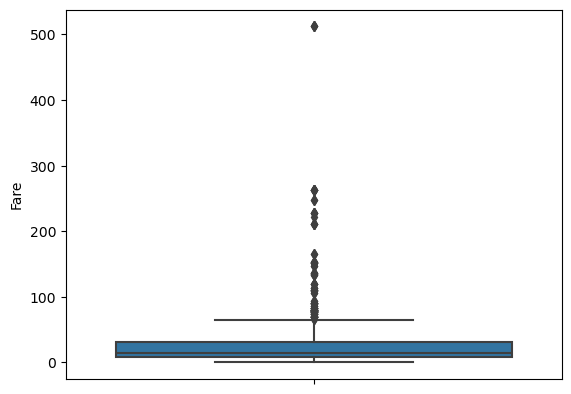

In [102]:
sns.boxplot(y = dataset['Fare'])

<Axes: ylabel='Fare'>

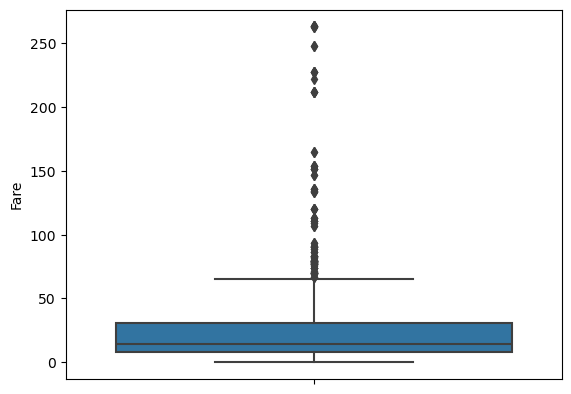

In [103]:
dataset.drop(dataset[dataset.Fare >= 500].index, inplace=True)
sns.boxplot(y=dataset['Fare'])

In [104]:
dataset.describe()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.352477,29.680083,0.524775,0.381757,30.582164
std,257.405474,0.834007,0.478011,13.019819,1.104186,0.806949,41.176366
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,445.500000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,667.250000,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[['Fare']] = scaler.fit_transform(dataset[['Fare']])
dataset.describe()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.352477,29.680083,0.524775,0.381757,0.116282
std,257.405474,0.834007,0.478011,13.019819,1.104186,0.806949,0.156564
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,22.000000,0.000000,0.000000,0.030022
50%,445.500000,3.000000,0.000000,29.699118,0.000000,0.000000,0.054959
75%,667.250000,3.000000,1.000000,35.000000,1.000000,0.000000,0.117003
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000


<Axes: >

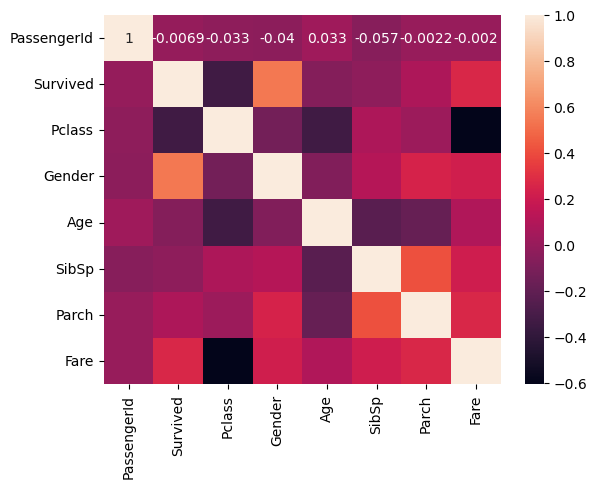

In [106]:
sns.heatmap(dataset.corr(), annot=True)

In [107]:
dataset = pd.read_csv('titanic.csv')

# 분석할 열 설정
x_columns = ['PassengerId', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare']
y_column = 'Survived'

# X와 y로 데이터 분할
X = dataset[x_columns]
y = dataset[y_column]

import numpy as np
# NumPy 배열로 변환
X = np.array(X)
y = np.array(y)

# 형태 출력
print(X.shape)
print(y.shape)

(895, 7)
(895,)


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=333)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(626, 7) (269, 7) (626,) (269,)


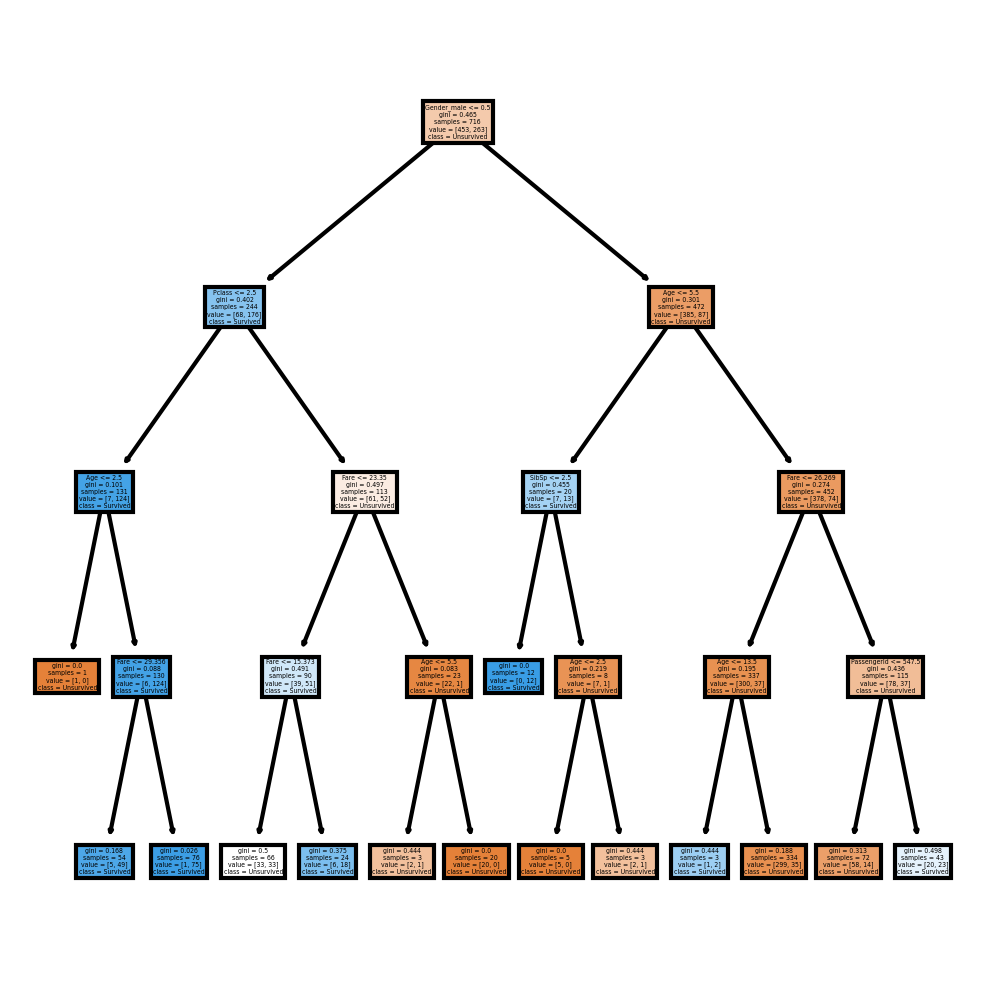

In [109]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 예시 데이터셋 로드 (titanic.csv 파일을 사용한다고 가정)
titanic_df = pd.read_csv('titanic.csv')

# 문자열 데이터를 숫자형 데이터로 변환
titanic_df = pd.get_dummies(titanic_df, columns=['Gender'], drop_first=True)

# 분석할 열 설정
x_columns = ['PassengerId', 'Pclass', 'Gender_male', 'Age', 'SibSp', 'Parch', 'Fare']
y_column = 'Survived'

# X와 y로 데이터 분할
X = titanic_df[x_columns]
y = titanic_df[y_column]

# NaN 값을 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 학습용 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사 결정 트리 분류기 학습
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_test)

# 트리 시각화
cn = ['Unsurvived', 'Survived']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(clf, feature_names=x_columns, class_names=cn, filled=True)
plt.show()

In [110]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Acc.: {}%'.format(np.round(acc * 100, 3)))

Acc.: 74.86%


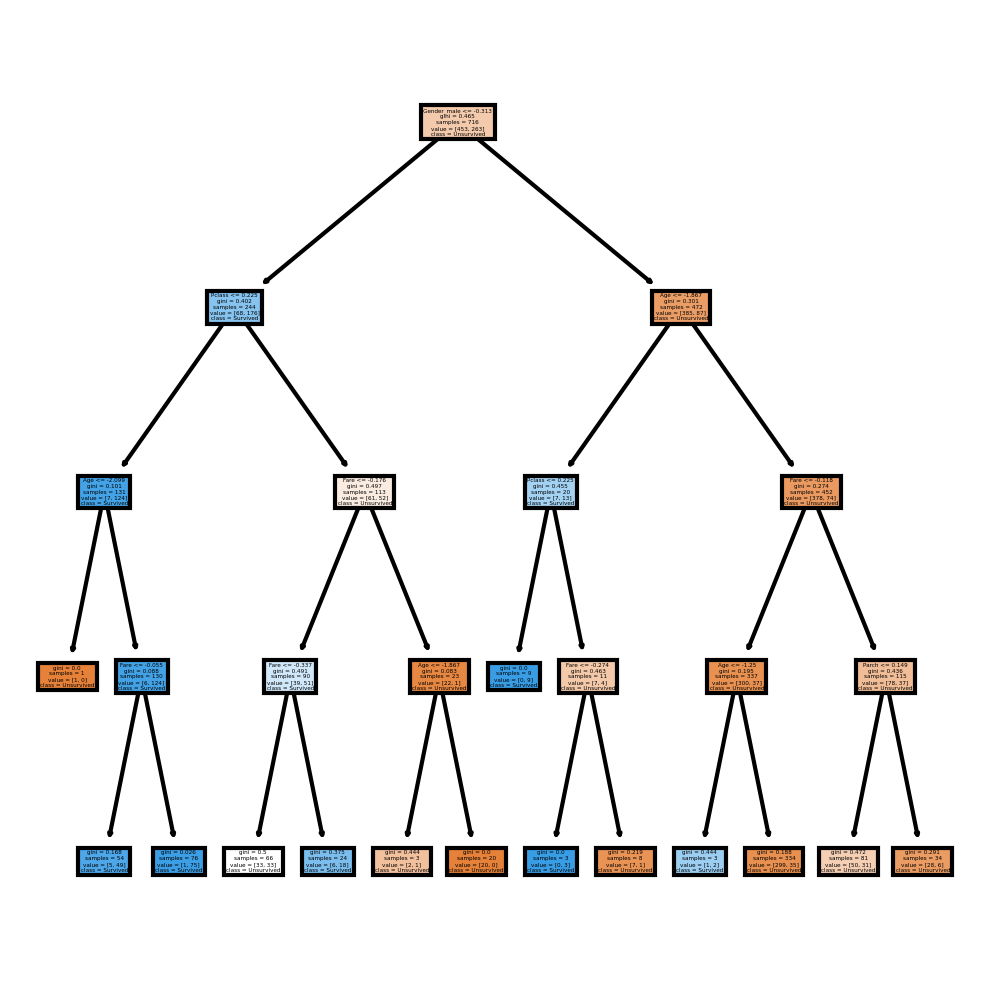

[[ 0.82426635  0.73515135 -0.59475605 -0.47237716 -0.50109483]
 [-1.5709232  -1.36026412  0.63918791 -0.47237716  0.79038695]
 [ 0.82426635 -1.36026412 -0.28627006 -0.47237716 -0.48748082]
 [-1.5709232  -1.36026412  0.40782342 -0.47237716  0.42364963]
 [ 0.82426635  0.73515135  0.40782342 -0.47237716 -0.4849597 ]]
(895, 5)


In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 예시 데이터셋 로드 (titanic.csv 파일을 사용한다고 가정)
titanic_df = pd.read_csv('titanic.csv')

# 문자열 데이터를 숫자형 데이터로 변환
titanic_df = pd.get_dummies(titanic_df, columns=['Gender'], drop_first=True)

# 분석할 열 설정
x_columns = ['Pclass', 'Gender_male', 'Age', 'Parch', 'Fare']
y_column = 'Survived'

# X와 y로 데이터 분할
X = titanic_df[x_columns]
y = titanic_df[y_column]

# NaN 값을 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습용 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사 결정 트리 분류기 학습
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_test)

# 트리 시각화
cn = ['Unsurvived', 'Survived']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(clf, feature_names=x_columns, class_names=cn, filled=True)
plt.show()

# 데이터 형태 확인
print(X[:5, :])
print(X.shape)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=333)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Acc.: {}%'.format(np.round(acc * 100, 3)))

(626, 5) (269, 5) (626,) (269,)
Acc.: 83.643%
